Pembuatan Model
--

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Logistic Regression.

Gunakan LogisticRegression() memanggil algoritma tersebut, fit ke data train dan simpan sebagai log_model

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.float64: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000).fit(x_train, y_train) 
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(max_iter=1000)


---
Performansi Model Training - Menampilkan Metrics
--

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.float64: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865



---
Performansi Model Training - Menampilkan Plots
--

Setelah mendapatkan hasil classification report pada tahap sebelumnya, sekarang kita akan melakukan visualisasi terhadap report tersebut. 


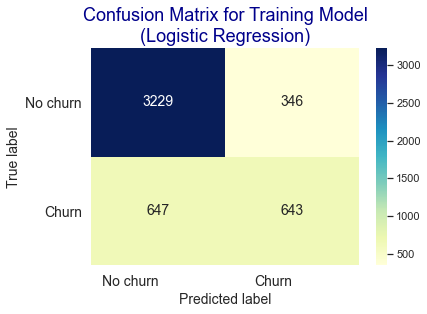

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.float64: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
y_train_pred = log_model.predict(x_train)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

---
Performansi Data Testing - Menampilkan Metrics
--

setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing seperti hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.float64: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



---
Performansi Data Testing - Menampilkan Plots
--

Setelah menampilkan metrics pada tahap sebelumnya, sekarang kita akan melakukan visualisasi dari metrics yang sudah dihasilkan sebelumnya

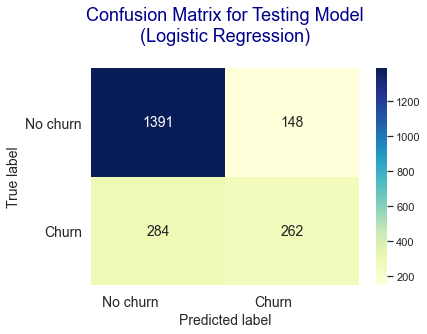

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.float64: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
y_test_pred = log_model.predict(x_test)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()